In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Some formatting for nicer figures
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

Thank you for submitting your solution!

The code will, as it is provided, work and return an approximation to $\pi$; very good. There are just some minor issues I would like to address.

In [2]:
def approximate_pi_metropolis(n_sample):
    position = np.array([0.5, 0.5])
    randomNums = np.empty([n_sample, 2])
    step = 0.05
    
    for i in range(0, n_sample):
        randomWalk = (np.random.random([2]) - 0.5) * step * 2
        while any(position + randomWalk < [0, 0]) or any(position + randomWalk > [1, 1]):
            randomWalk = (np.random.random([2]) - 0.5) * step * 2
        position = np.add(position, randomWalk)
        randomNums[i] = position

    square = np.sum(np.power(randomNums, 2), axis = 1)
    index = np.where(square <= 1.0)[0]
    
    plt.plot(randomNums[:, 0],randomNums[:, 1], 'r-', lw = 0.1)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    return np.size(index) / n_sample * 4

- Your step is very small which will slow down sampling the unit circle and, thus, require longer chains to get a good estimate for $\pi$.
- You have an inner loop (lines 7-9) to force acceptance within every single outer loop iteration; this violates the Metropolis algorithm which states that, in the rejection case, the Markov chain should repeat the last accepted element again.
- You supply arguments in a too complicated manner, e.g., ``np.random.rand(2)`` instead of ``np.random.rand([2])`` or ``any(position + randomWalk < 0)`` instead ``any(position + randomWalk < [0, 0])``.
- Your naming convention deviates from the [PEP8](https://www.python.org/dev/peps/pep-0008/) which, in combination with the issue before, makes your code look a bit unpythonic. The [PEP8](https://www.python.org/dev/peps/pep-0008/) standard, which describes good python style, is not a hard rule or one I would like to enforce. It does, though, make it easier for other developers if your code looks familiar to them.

3.16852

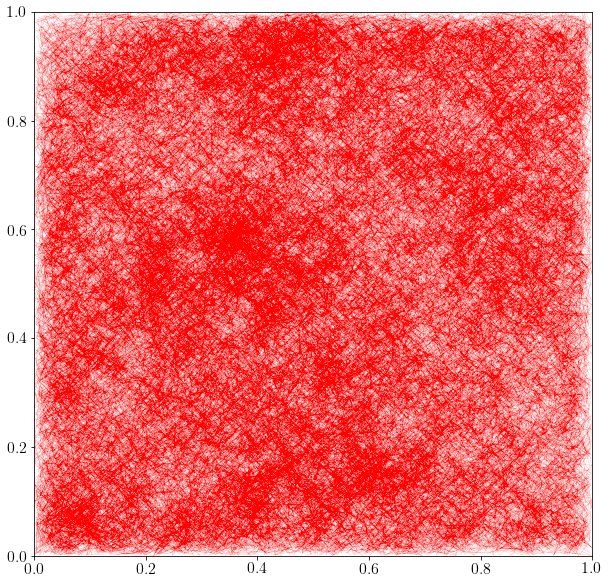

In [3]:
approximate_pi_metropolis(100000) #do not use 10^6 or higher

- The visualization hints at aan agreeable sampling of the unit square; it's good to look at these things!
- You already found that using too large an ``n_sample`` is not recommended. While this is of no big consequence here, you should be aware that in other cases, this would prevent you from achieving good sampling. It these cases, you would need to evaluate each new element of the Markov chain as it comes (or process them in batches).

All in all, this is a good solution. I would recommend to look into the Metropolis algorithm again to understand how your approach deviates.